# PROJECT 1 “THE HOSTS” RESEARCH AGENCY

## WHERE TO INVEST IN ORDER TO BE A HOST IN CDMX?

# Relation between amount of properties and location

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps

from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

# Files to Load
airbnb_data = "data_base_clean.csv"

# Read Aribnb Data File and store into Pandas Data Frames
airbnb_df=pd.read_csv(airbnb_data)

# Show Airbnb dataframe to validate
airbnb_df.head()


,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,bed_type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,Private room,1957,1,10,11/05/2018,0.58,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87.0
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,Private room,1906,1,39,02/05/2019,0.43,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89.0
2,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,Entire home/apt,1620,3,37,01/01/2019,0.41,1,173,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",100.0
3,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,Private room,953,2,51,05/04/2019,2.69,3,180,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",98.0
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,Entire home/apt,1810,2,39,24/02/2019,0.43,3,340,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",98.0


In [3]:
airbnb_reduced=airbnb_df[["id","neighbourhood_cleansed","neighbourhood","zipcode","latitude","longitude","price",]]
airbnb_reduced.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [4]:
airbnb_reduced["price"].describe()

count     10696.000000
mean       1148.362565
std        2780.347372
min           0.000000
25%         457.000000
50%         800.000000
75%        1315.000000
max      190573.000000
Name: price, dtype: float64

In [5]:
# Remove properties with no price per night 
airbnb_positive=airbnb_reduced.loc[airbnb_reduced["price"]>0,["id","neighbourhood_cleansed","neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [6]:
# Remove properties with  excesively price per night (outliers)
airbnb_real=airbnb_positive.loc[airbnb_reduced["price"]<37000,["id","neighbourhood_cleansed","neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_real.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [7]:
airbnb_real["price"].describe()

count    10686.000000
mean      1111.986057
std       1393.130297
min        172.000000
25%        457.000000
50%        800.000000
75%       1315.000000
max      36484.000000
Name: price, dtype: float64

In [8]:
#rename Neighbourhood_cleansed column

airbnb_real.rename(columns={"neighbourhood_cleansed":"county"})


,id,county,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810
5,70644,Coyoacan,Coyoacan,4100,19.35601,-99.16167,1048
6,70737,Coyoacan,Coyoacan,4100,19.35466,-99.16304,1124
7,180808,Cuauhtemoc,Juarez,6600,19.42428,-99.16843,1029
8,245507,Cuauhtemoc,Juarez,6600,19.42510,-99.17067,1315
9,246057,Cuauhtemoc,Juarez,6600,19.42373,-99.17140,1429


In [9]:
# Start with CDMX SUMMARY
# Calculate the total number of properties using nunique
properties_count=airbnb_real["id"].nunique()
#Validate
print(properties_count)

10686


In [10]:
#Count properties per counties
properties_per_county=airbnb_real.groupby(["neighbourhood_cleansed"]).count()["id"]
print(properties_per_county)

neighbourhood_cleansed
Alvaro Obregon          264
Azcapotzalco             27
Benito Juarez          2009
Coyoacan                748
Cuauhtemoc             5674
Gustavo A. Madero        12
Iztacalco                32
Iztapalapa               15
Miguel Hidalgo         1881
Venustiano Carranza      24
Name: id, dtype: int64


In [11]:
#Calculate the average price per night
night_average=airbnb_real["price"].mean()
#Validate
print(night_average)

1111.9860565225529


In [12]:
county_distribution=properties_per_county/properties_count*100
print(county_distribution)

neighbourhood_cleansed
Alvaro Obregon          2.470522
Azcapotzalco            0.252667
Benito Juarez          18.800299
Coyoacan                6.999813
Cuauhtemoc             53.097511
Gustavo A. Madero       0.112296
Iztacalco               0.299457
Iztapalapa              0.140371
Miguel Hidalgo         17.602471
Venustiano Carranza     0.224593
Name: id, dtype: float64


In [13]:
#price average in each county
average_price_per_county = airbnb_real.groupby(["neighbourhood_cleansed"]).mean()["price"]
print(average_price_per_county)

neighbourhood_cleansed
Alvaro Obregon          870.700758
Azcapotzalco            651.888889
Benito Juarez           706.930314
Coyoacan                892.862299
Cuauhtemoc             1188.152450
Gustavo A. Madero       609.583333
Iztacalco               444.312500
Iztapalapa              700.133333
Miguel Hidalgo         1466.392344
Venustiano Carranza     634.875000
Name: price, dtype: float64


In [14]:
#Create a dataframe to hold the above results
CDMX_Summary = pd.DataFrame({  "Available Properties in County"   : properties_per_county, 
                               "% of Total Available Properties"  : county_distribution,
                               "Average Night Price"              : average_price_per_county})  


In [15]:
CDMX_Summary=CDMX_Summary[["Available Properties in County","% of Total Available Properties","Average Night Price"]]
CDMX_Summary

,Available Properties in County,% of Total Available Properties,Average Night Price
neighbourhood_cleansed,,,
Alvaro Obregon,264,2.470522,870.700758
Azcapotzalco,27,0.252667,651.888889
Benito Juarez,2009,18.800299,706.930314
Coyoacan,748,6.999813,892.862299
Cuauhtemoc,5674,53.097511,1188.152450
Gustavo A. Madero,12,0.112296,609.583333
Iztacalco,32,0.299457,444.312500
Iztapalapa,15,0.140371,700.133333
Miguel Hidalgo,1881,17.602471,1466.392344


In [16]:
#Sort and display ascending price
Highest_Price_Counties = CDMX_Summary.sort_values("Average Night Price", ascending=False)

Highest_Price_Counties.head(10)

,Available Properties in County,% of Total Available Properties,Average Night Price
neighbourhood_cleansed,,,
Miguel Hidalgo,1881,17.602471,1466.392344
Cuauhtemoc,5674,53.097511,1188.152450
Coyoacan,748,6.999813,892.862299
Alvaro Obregon,264,2.470522,870.700758
Benito Juarez,2009,18.800299,706.930314
Iztapalapa,15,0.140371,700.133333
Azcapotzalco,27,0.252667,651.888889
Venustiano Carranza,24,0.224593,634.875000
Gustavo A. Madero,12,0.112296,609.583333


In [17]:
#Sort and display ascending percentage of properties
Highest_Available_Properties = CDMX_Summary.sort_values("% of Total Available Properties", ascending=False)

Highest_Available_Properties.head(10)

,Available Properties in County,% of Total Available Properties,Average Night Price
neighbourhood_cleansed,,,
Cuauhtemoc,5674,53.097511,1188.152450
Benito Juarez,2009,18.800299,706.930314
Miguel Hidalgo,1881,17.602471,1466.392344
Coyoacan,748,6.999813,892.862299
Alvaro Obregon,264,2.470522,870.700758
Iztacalco,32,0.299457,444.312500
Azcapotzalco,27,0.252667,651.888889
Venustiano Carranza,24,0.224593,634.875000
Iztapalapa,15,0.140371,700.133333


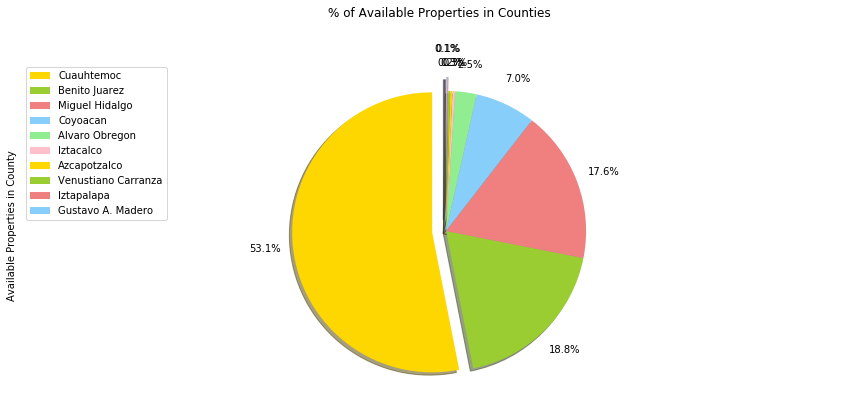

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0,0,0,0,0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

Highest_Available_Properties['Available Properties in County'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('% of Available Properties in Counties', y=1.12) 
 
plt.axis('equal') 
 
# add legend
plt.legend(labels=Highest_Available_Properties.index, loc='upper left') 

plt.savefig("Images/Proportion_available_properties_cdmx.png",bbox_inches = 'tight')
 
plt.show()
 

In [19]:
# For Map graph

# Store latitude and longitude in locations
locations = airbnb_real[["latitude", "longitude"]]

price= airbnb_real["price"].astype(float)

In [22]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, 
                                 dissipating=False, max_intensity=1000000,
                                 point_radius=10)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

# Relation between price and location

In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


# read csv
file = "data_base_clean.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head(2)

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,bed_type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,Private room,1957,1,10,11/05/2018,0.58,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87.0
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,Private room,1906,1,39,02/05/2019,0.43,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89.0


In [24]:
#df.count()

In [25]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'neighbourhood', 'zipcode', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'bed_type', 'amenities', 'review_scores_rating'],
      dtype='object')

In [26]:
# Remove properties with no price per night
airbnb_positive_df = df.loc[df["price"]>0,["id","neighbourhood_cleansed","neighbourhood",
                                        "zipcode","latitude","longitude","price"]]
airbnb_positive_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [27]:
# Remove properties with price per night higher than 37,000
airbnb_positive1_df = airbnb_positive_df.loc[airbnb_positive_df["price"]<37000,["id","neighbourhood_cleansed",
                                        "neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [28]:
#airbnb_positive1_df.count()

In [29]:
#Check data types
#airbnb_positive1_df.dtypes

In [30]:
#Review prices
#price = df["price"].unique()
#len(price)

In [31]:
#Group County and Neighbourhood
county_neig = airbnb_positive1_df.groupby(["neighbourhood_cleansed","neighbourhood"])

max_price = county_neig['price'].max()
min_price = county_neig['price'].min()
mean_price = county_neig['price'].mean()

#Create a summary data frame to hold the results
county_neig_df = pd.DataFrame({"Maximum Price":max_price,
                                 "Minimum Price":min_price,
                                 "Average Price":mean_price})
county_neig_df.head()

Maximum Price  Minimum Price  \
neighbourhood_cleansed neighbourhood                                           
Alvaro Obregon         Campestre/Guadalupe Inn           6251            190   
                       Coyoacan                          1334           1334   
                       Florida/Axotla                    2280            248   
                       Insurgentes                       1296            686   
                       Nonoalco                          1277            191   

                                                Average Price  
neighbourhood_cleansed neighbourhood                           
Alvaro Obregon         Campestre/Guadalupe Inn     955.611111  
                       Coyoacan                   1334.000000  
                       Florida/Axotla              787.392157  
                       Insurgentes                1010.000000  
                       Nonoalco                    653.272727

# Price summary

In [32]:
#Group by County (descending price)
county = airbnb_positive1_df.groupby(["neighbourhood_cleansed"])

max_price = county['price'].max()
min_price = county['price'].min()
mean_price = county['price'].mean()
county_properties = county['neighbourhood_cleansed'].count()

#Create a summary data frame to hold the results
county_df = pd.DataFrame({"Maximum Price":max_price,
                          "Minimum Price":min_price,
                          "Average Price":mean_price,
                          "Number of properties":county_properties})

descending_county_df = county_df.sort_values("Maximum Price", ascending = True)

descending_county_df["Maximum Price"] = descending_county_df["Maximum Price"].map("${:,.2f}".format)
descending_county_df["Minimum Price"] = descending_county_df["Minimum Price"].map("${:,.2f}".format)
descending_county_df["Average Price"] = descending_county_df["Average Price"].map("${:,.2f}".format)
descending_county_df

,Maximum Price,Minimum Price,Average Price,Number of properties
neighbourhood_cleansed,,,,
Iztacalco,"$1,296.00",$210.00,$444.31,32
Azcapotzalco,"$1,748.00",$190.00,$651.89,27
Gustavo A. Madero,"$1,824.00",$209.00,$609.58,12
Iztapalapa,"$2,001.00",$229.00,$700.13,15
Venustiano Carranza,"$4,193.00",$191.00,$634.88,24
Alvaro Obregon,"$6,251.00",$172.00,$870.70,264
Benito Juarez,"$23,974.00",$172.00,$706.93,2009
Coyoacan,"$28,586.00",$172.00,$892.86,748
Miguel Hidalgo,"$34,303.00",$191.00,"$1,466.39",1881


In [33]:
#Group by County
county1 = airbnb_positive1_df.groupby(["neighbourhood_cleansed"])

max_price = county1['price'].max()
min_price = county1['price'].min()
mean_price = county1['price'].mean()
county_properties = county1['neighbourhood_cleansed'].count()

#Create a summary data frame to hold the results
county1_df = pd.DataFrame({"Maximum Price":max_price,
                          "Minimum Price":min_price,
                          "Average Price":mean_price,
                          "Number of properties":county_properties})

county1_df.head()

,Maximum Price,Minimum Price,Average Price,Number of properties
neighbourhood_cleansed,,,,
Alvaro Obregon,6251,172,870.700758,264
Azcapotzalco,1748,190,651.888889,27
Benito Juarez,23974,172,706.930314,2009
Coyoacan,28586,172,892.862299,748
Cuauhtemoc,36484,172,1188.152450,5674


In [34]:
# index to column
county1_df['neighbourhood_cleansed'] = county1_df.index
county1_df.head()

,Maximum Price,Minimum Price,Average Price,Number of properties,neighbourhood_cleansed
neighbourhood_cleansed,,,,,
Alvaro Obregon,6251,172,870.700758,264,Alvaro Obregon
Azcapotzalco,1748,190,651.888889,27,Azcapotzalco
Benito Juarez,23974,172,706.930314,2009,Benito Juarez
Coyoacan,28586,172,892.862299,748,Coyoacan
Cuauhtemoc,36484,172,1188.152450,5674,Cuauhtemoc


In [35]:
# neighbourhood
result_county = county1_df["neighbourhood_cleansed"].tolist()
result_county

['Alvaro Obregon',
 'Azcapotzalco',
 'Benito Juarez',
 'Coyoacan',
 'Cuauhtemoc',
 'Gustavo A. Madero',
 'Iztacalco',
 'Iztapalapa',
 'Miguel Hidalgo',
 'Venustiano Carranza']

In [36]:
# maximum price to list
max_price = county1_df["Maximum Price"].tolist()
max_price

[6251, 1748, 23974, 28586, 36484, 1824, 1296, 2001, 34303, 4193]

In [37]:
# minimum price to list
min_price = county1_df["Minimum Price"].tolist()
min_price

[172, 190, 172, 172, 172, 209, 210, 229, 191, 191]

In [38]:
# average price to list
avg_price = county1_df["Average Price"].tolist()
avg_price

[870.7007575757576,
 651.8888888888889,
 706.9303135888501,
 892.8622994652407,
 1188.1524497708847,
 609.5833333333334,
 444.3125,
 700.1333333333333,
 1466.3923444976076,
 634.875]

## Bar chart - Average Price

In [39]:
final_county = result_county
x_axis = np.arange(len(final_county))

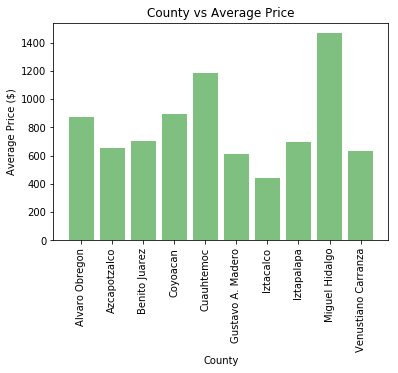

In [41]:
#plt.bar(x_axis, min_price, color='b', alpha=0.5, align="center")
#plt.bar(x_axis, max_price, color='r', alpha=0.5, align="center")
plt.bar(x_axis, avg_price, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Average Price")
plt.xlabel("County")
plt.ylabel("Average Price ($)")
plt.show
plt.savefig("Images/bar_avgprice.png",bbox_inches = 'tight')

# Bar chart - Max Price

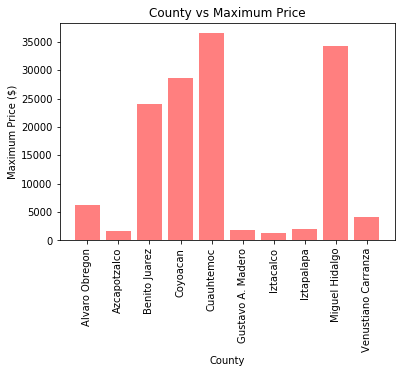

In [42]:
#plt.bar(x_axis, min_price, color='b', alpha=0.5, align="center")
plt.bar(x_axis, max_price, color='r', alpha=0.5, align="center")
#plt.bar(x_axis, avg_price, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Maximum Price")
plt.xlabel("County")
plt.ylabel("Maximum Price ($)")
plt.show
plt.savefig("Images/bar_maxprice.png",bbox_inches = 'tight')

# Bar chart - Min Price

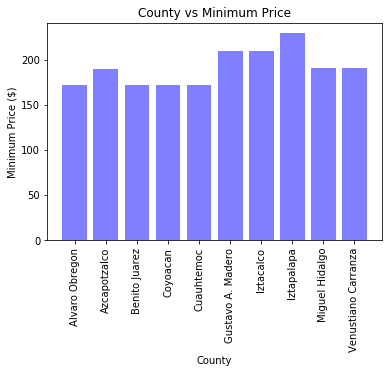

In [43]:
plt.bar(x_axis, min_price, color='b', alpha=0.5, align="center")
#plt.bar(x_axis, max_price, color='r', alpha=0.5, align="center")
#plt.bar(x_axis, avg_price, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Minimum Price")
plt.xlabel("County")
plt.ylabel("Minimum Price ($)")
plt.show
plt.savefig("Images/bar_minprice.png",bbox_inches = 'tight')

# Pie chart

In [45]:
county = result_county
average = avg_price
colors = ["beige", "green", "lightblue", "orange", "gray",
          "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.05)

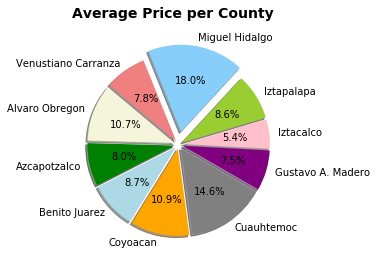

In [46]:
plt.pie(average, explode=explode, labels=county, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.suptitle("Average Price per County", fontsize=14, fontweight='bold')
plt.savefig("Images/pie_avgprice.png",bbox_inches = 'tight')

# Scatter plot - Max Price

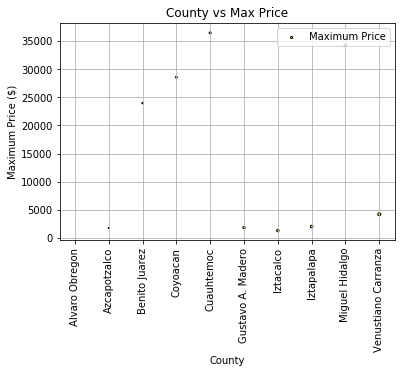

In [47]:
plt.scatter(result_county, max_price, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=1, label="Maximum Price")
plt.title("County vs Max Price")
plt.xlabel("County")
plt.ylabel("Maximum Price ($)")
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.legend(loc="upper right")
plt.grid()
plt.show
plt.savefig("Images/scatter_maxprice.png",bbox_inches = 'tight')

# Scatter plot - all counties / all prices

In [48]:
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [52]:
# all county to list
all_county = airbnb_positive1_df["neighbourhood_cleansed"].tolist()
#all_county

In [53]:
# all price to list
all_price = airbnb_positive1_df["price"].tolist()
#all_price

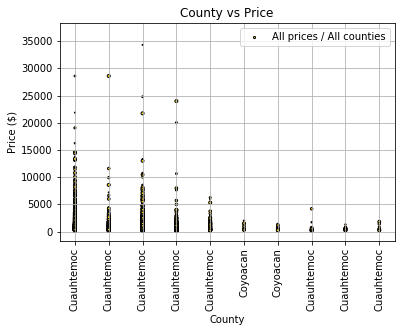

In [55]:
plt.scatter(all_county, all_price, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=1, label="All prices / All counties")
plt.title("County vs Price")
plt.xlabel("County")
plt.ylabel("Price ($)")
plt.xticks(tick_locations, all_county, rotation='vertical')
plt.legend(loc="upper right")
plt.grid()
plt.show
plt.savefig("Images/scatter_allprice.png",bbox_inches = 'tight')

# Scatter plot - all prices

In [56]:
# Remove properties with no price per night
alvaro_obregon_df = df.loc[df["neighbourhood_cleansed"] == "Alvaro Obregon",["neighbourhood","price"]]
alvaro_obregon_df.head()

,neighbourhood,price
28,Nonoalco,229
54,Campestre/Guadalupe Inn,6251
101,Campestre/Guadalupe Inn,5891
135,Campestre/Guadalupe Inn,591
162,Campestre/Guadalupe Inn,3002


In [57]:
alvaro_obregon_price = alvaro_obregon_df["price"].tolist()
alvaro_obregon_neighbourhood = alvaro_obregon_df["neighbourhood"].tolist()
#alvaro_obregon_price
#alvaro_obregon_neighbourhood

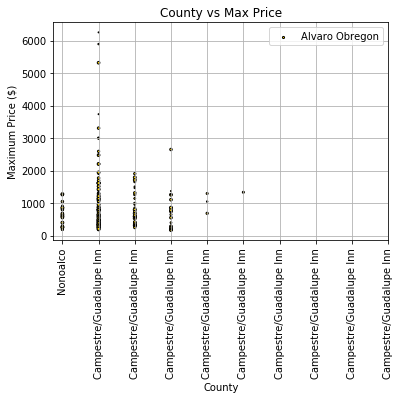

In [58]:
plt.scatter(alvaro_obregon_neighbourhood, alvaro_obregon_price, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=1, label="Alvaro Obregon")
plt.title("County vs Max Price")
plt.xlabel("County")
plt.ylabel("Maximum Price ($)")
plt.xticks(tick_locations, alvaro_obregon_neighbourhood, rotation='vertical')
plt.legend(loc="upper right")
plt.grid()
plt.show
plt.savefig("Images/scatter_backup.png",bbox_inches = 'tight')

# p-value

In [59]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [60]:
# using the clean dataframe >0 and <37,000
airbnb_positive1_df = airbnb_positive_df.loc[airbnb_positive_df["price"]<37000,["id","neighbourhood_cleansed",
                                        "neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [61]:
# inserting a new column index1 for p-value purpose
# assigning values to each neighbourhood_cleansed
# Alvaro Obregon=1, Azcapotzalco=2, Benito Juarez=3, Coyoacan=4, Cuauhtemoc=5
# Gustavo A. Madero=6, Iztacalco=7, Iztapalapa=8, Miguel Hidalgo=9, Venustiano Carranza=10
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Alvaro Obregon', 'index1'] = 1
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Azcapotzalco', 'index1'] = 2
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Benito Juarez', 'index1'] = 3
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Coyoacan', 'index1'] = 4
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Cuauhtemoc', 'index1'] = 5
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Gustavo A. Madero', 'index1'] = 6
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Iztacalco', 'index1'] = 7
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Iztapalapa', 'index1'] = 8
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Miguel Hidalgo', 'index1'] = 9
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Venustiano Carranza', 'index1'] = 10
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price,index1
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957,5.0
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906,5.0
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620,5.0
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953,5.0
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810,5.0


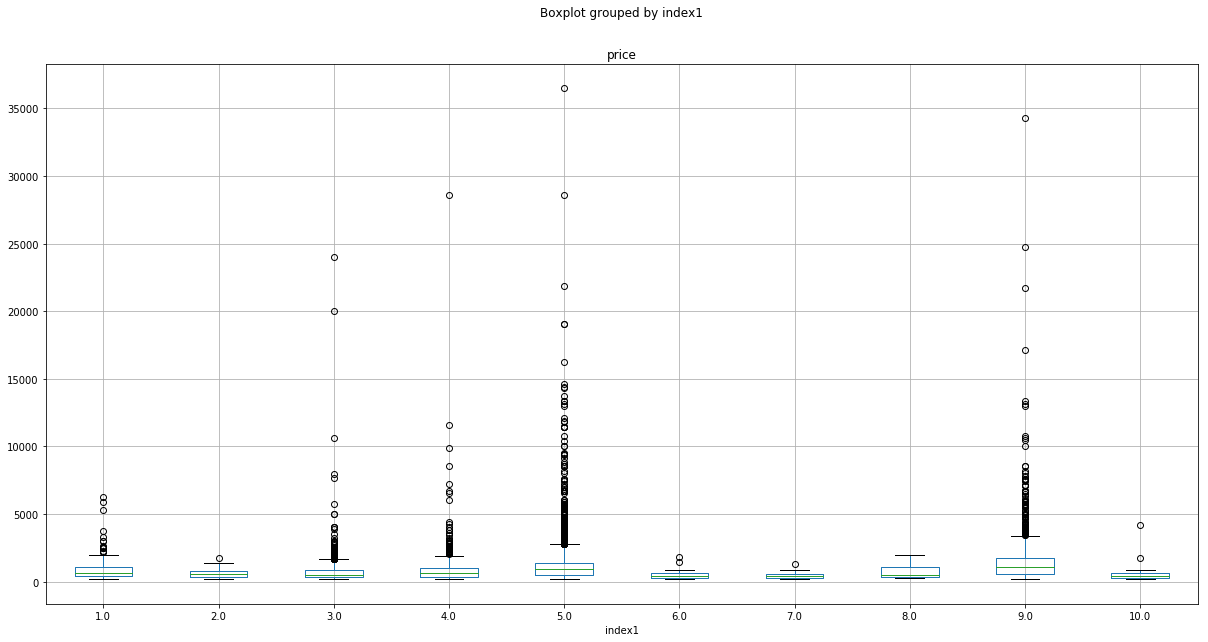

In [62]:
# Create a boxplot to compare means
airbnb_positive1_df.boxplot("price", by="index1", figsize=(20, 10))
plt.savefig("Images/pvalue_price.png",bbox_inches = 'tight')

In [63]:
# Extract individual groups
group1 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 1]["price"]
group2 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 2]["price"]
group3 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 3]["price"]
group4 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 4]["price"]
group5 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 5]["price"]
group6 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 6]["price"]
group7 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 7]["price"]
group8 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 8]["price"]
group9 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 9]["price"]
group10 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 10]["price"]

In [64]:
# Perform the ANOVA
stats.f_oneway(group1, group2)

F_onewayResult(statistic=1.9361317311939898, pvalue=0.16515928290108603)

# p-value option 2

In [65]:
# using the clean dataframe >0 and <...
airbnb_positive12_df = airbnb_positive_df.loc[airbnb_positive_df["price"]<1000,["id","neighbourhood_cleansed",
                                        "neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive12_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
15,325812,Cuauhtemoc,Centro Historico,6000,19.43453,-99.14675,648
16,326296,Coyoacan,Florida/Axotla,4318,19.34004,-99.18273,380
17,326475,Cuauhtemoc,Roma Norte,6700,19.41297,-99.15735,648
20,386265,Coyoacan,Coyoacan,4040,19.34303,-99.15425,248


In [66]:
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Alvaro Obregon', 'index1'] = 1
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Azcapotzalco', 'index1'] = 2
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Benito Juarez', 'index1'] = 3
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Coyoacan', 'index1'] = 4
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Cuauhtemoc', 'index1'] = 5
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Gustavo A. Madero', 'index1'] = 6
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Iztacalco', 'index1'] = 7
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Iztapalapa', 'index1'] = 8
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Miguel Hidalgo', 'index1'] = 9
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Venustiano Carranza', 'index1'] = 10
airbnb_positive12_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price,index1
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953,5.0
15,325812,Cuauhtemoc,Centro Historico,6000,19.43453,-99.14675,648,5.0
16,326296,Coyoacan,Florida/Axotla,4318,19.34004,-99.18273,380,4.0
17,326475,Cuauhtemoc,Roma Norte,6700,19.41297,-99.15735,648,5.0
20,386265,Coyoacan,Coyoacan,4040,19.34303,-99.15425,248,4.0


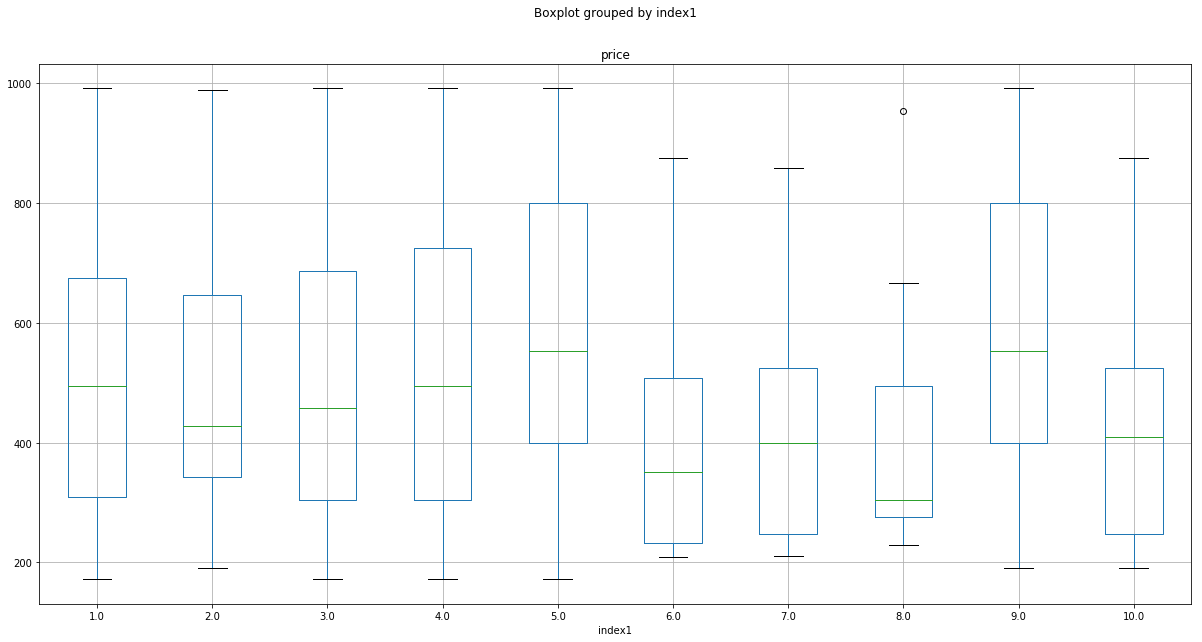

In [67]:
# Create a boxplot to compare means
airbnb_positive12_df.boxplot("price", by="index1", figsize=(20, 10))
plt.savefig("Images/pvalue2_price.png",bbox_inches = 'tight')

In [68]:
group1 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 1]["price"]
group2 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 2]["price"]
group3 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 3]["price"]
group4 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 4]["price"]
group5 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 5]["price"]
group6 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 6]["price"]
group7 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 7]["price"]
group8 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 8]["price"]
group9 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 9]["price"]
group10 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 10]["price"]

In [69]:
# Perform the ANOVA
stats.f_oneway(group1, group2)

F_onewayResult(statistic=0.07260978007150497, pvalue=0.7878387463980046)

# Relation between reviews/scores and location

In [12]:
#import variables and read cvs
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = "data_base_clean.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'neighbourhood', 'zipcode', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'bed_type', 'amenities', 'review_scores_rating'],
      dtype='object')

In [13]:
reduced_df = df[["neighbourhood_cleansed", "neighbourhood", "latitude", "longitude",
                 "room_type", "number_of_reviews", "review_scores_rating"]]
reduced_df.head()

,neighbourhood_cleansed,neighbourhood,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,Cuauhtemoc,San Rafael,19.44076,-99.16324,Private room,10,87.0
1,Cuauhtemoc,Condesa,19.41006,-99.17645,Private room,39,89.0
2,Cuauhtemoc,Roma Norte,19.42292,-99.15775,Entire home/apt,37,100.0
3,Cuauhtemoc,Condesa,19.41259,-99.17959,Private room,51,98.0
4,Cuauhtemoc,Hipodromo,19.41375,-99.17028,Entire home/apt,39,98.0


In [14]:
reduced_df.describe()

,latitude,longitude,number_of_reviews,review_scores_rating
count,10696.000000,10696.000000,10696.000000,10696.000000
mean,19.409178,-99.167835,29.479712,95.270475
std,0.027382,0.016838,40.233175,8.078429
min,19.334160,-99.219340,1.000000,20.000000
25%,19.395962,-99.177360,4.000000,94.000000
50%,19.414680,-99.168490,13.000000,97.000000
75%,19.429960,-99.157308,39.000000,100.000000
max,19.473550,-99.115820,473.000000,100.000000


In [15]:
total_anuncios = reduced_df["number_of_reviews"].count()
total_reviews = reduced_df["number_of_reviews"].sum()

table_resume = pd.DataFrame({"Total Announcements":[total_anuncios],
                             "Total Reviews":[total_reviews]})
table_resume["Total Announcements"] = table_resume["Total Announcements"].astype(float).map("{:,.0f}".format)
table_resume["Total Reviews"] = table_resume["Total Reviews"].astype(float).map("{:,.0f}".format)
table_resume

,Total Announcements,Total Reviews
0,"10,696","315,315"


In [16]:
total_count_entire = reduced_df[reduced_df["room_type"]=="Entire home/apt"].count()["number_of_reviews"]
total_count_private = reduced_df[reduced_df["room_type"]=="Private room"].count()["number_of_reviews"]
total_sum_entire = reduced_df[reduced_df["room_type"]=="Entire home/apt"].sum()["number_of_reviews"]
total_sum_private = reduced_df[reduced_df["room_type"]=="Private room"].sum()["number_of_reviews"]

table_resume_types = pd.DataFrame({"Total Entire Rooms Announcements":[total_count_entire],
                                   "Total Private Rooms Announcements" : [total_count_private],
                                   "Total Entire Rooms Reviews": [total_sum_entire],
                                   "Total Private Rooms Reviews":[total_sum_private]
                                  })

table_resume_types["Total Entire Rooms Announcements"] = table_resume_types["Total Entire Rooms Announcements"].astype(float).map("{:,.0f}".format)
table_resume_types["Total Private Rooms Announcements"] = table_resume_types["Total Private Rooms Announcements"].astype(float).map("{:,.0f}".format)
table_resume_types["Total Entire Rooms Reviews"] = table_resume_types["Total Entire Rooms Reviews"].astype(float).map("{:,.0f}".format)
table_resume_types["Total Private Rooms Reviews"] = table_resume_types["Total Private Rooms Reviews"].astype(float).map("{:,.0f}".format)
table_resume_types

,Total Entire Rooms Announcements,Total Private Rooms Announcements,Total Entire Rooms Reviews,Total Private Rooms Reviews
0,"6,153","4,419","219,891","94,004"


<IPython.core.display.Javascript object>


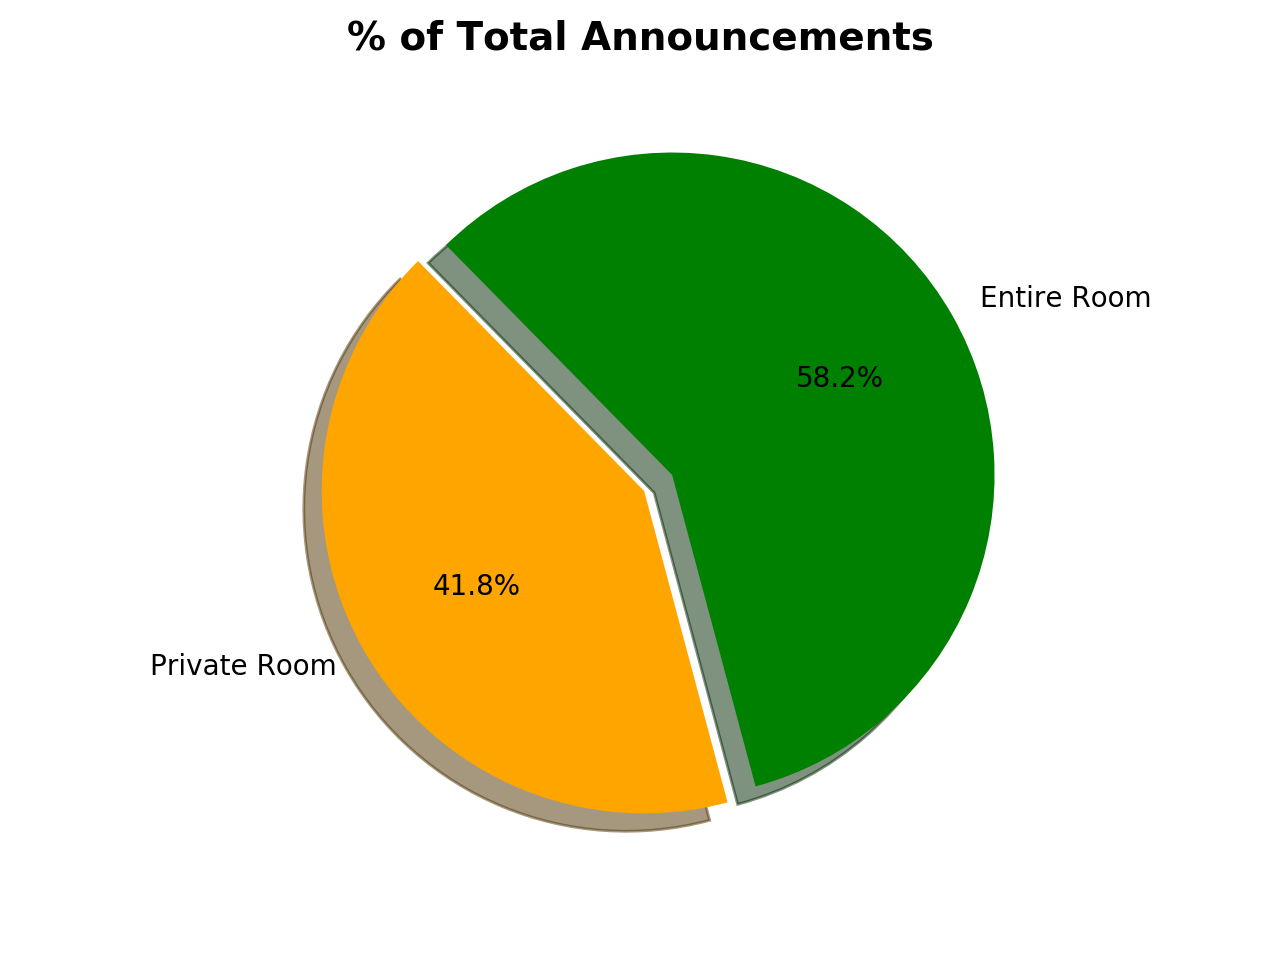

In [17]:
anuncios = [total_count_entire,total_count_private]

labels = ["Entire Room", "Private Room"]
colors = ["green", "orange"]

plt.pie(anuncios,explode=(0.1,0),colors=colors,startangle=285,labels=labels,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Announcements", fontsize=14, fontweight='bold')
plt.axis("equal")
plt.savefig("Images/Pie_Anuncios.png",bbox_inches = 'tight')

In [10]:
resenas = [total_sum_entire,total_sum_private]

labels01 = ["Entire Room", "Private Room"]
colors01 = ["green", "orange"]

plt.pie(resenas,explode=(0.1,0),colors=colors,startangle=285,labels=labels,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Reviews", fontsize=14, fontweight='bold')
plt.axis("equal")
plt.savefig("Images/Pie_Resenas.png",bbox_inches = 'tight')

plt.show()

In [18]:
table_df_02 = reduced_df.groupby(["neighbourhood_cleansed"])
reviews_count = table_df_02["number_of_reviews"].count()
reviews_sum = table_df_02["number_of_reviews"].sum()
scores_average = table_df_02["review_scores_rating"].mean()
scores_max = table_df_02["review_scores_rating"].max()
scores_min = table_df_02["review_scores_rating"].min()

reviews_neighborhood_df = pd.DataFrame({"Total Announcements":reviews_count,
                               "Total Reviews":reviews_sum,
                                "Average Score": scores_average,
                                })
reviews_neighborhood_df["Total Announcements"] = reviews_neighborhood_df["Total Announcements"].astype(float)#.map("{:,.0f}".format)
reviews_neighborhood_df["Total Reviews"] = reviews_neighborhood_df["Total Reviews"].astype(float)#.map("{:,.0f}".format)
reviews_neighborhood_df["Average Score"] = reviews_neighborhood_df["Average Score"].astype(float)#.map("{:,.2f}".format)
reviews_neighborhood_df

,Total Announcements,Total Reviews,Average Score
neighbourhood_cleansed,,,
Alvaro Obregon,264.0,4082.0,96.041667
Azcapotzalco,27.0,437.0,97.370370
Benito Juarez,2009.0,41082.0,95.205575
Coyoacan,748.0,17395.0,95.994652
Cuauhtemoc,5680.0,201402.0,95.167606
Gustavo A. Madero,12.0,149.0,97.333333
Iztacalco,32.0,655.0,95.125000
Iztapalapa,15.0,237.0,97.400000
Miguel Hidalgo,1885.0,49331.0,95.196817


<IPython.core.display.Javascript object>


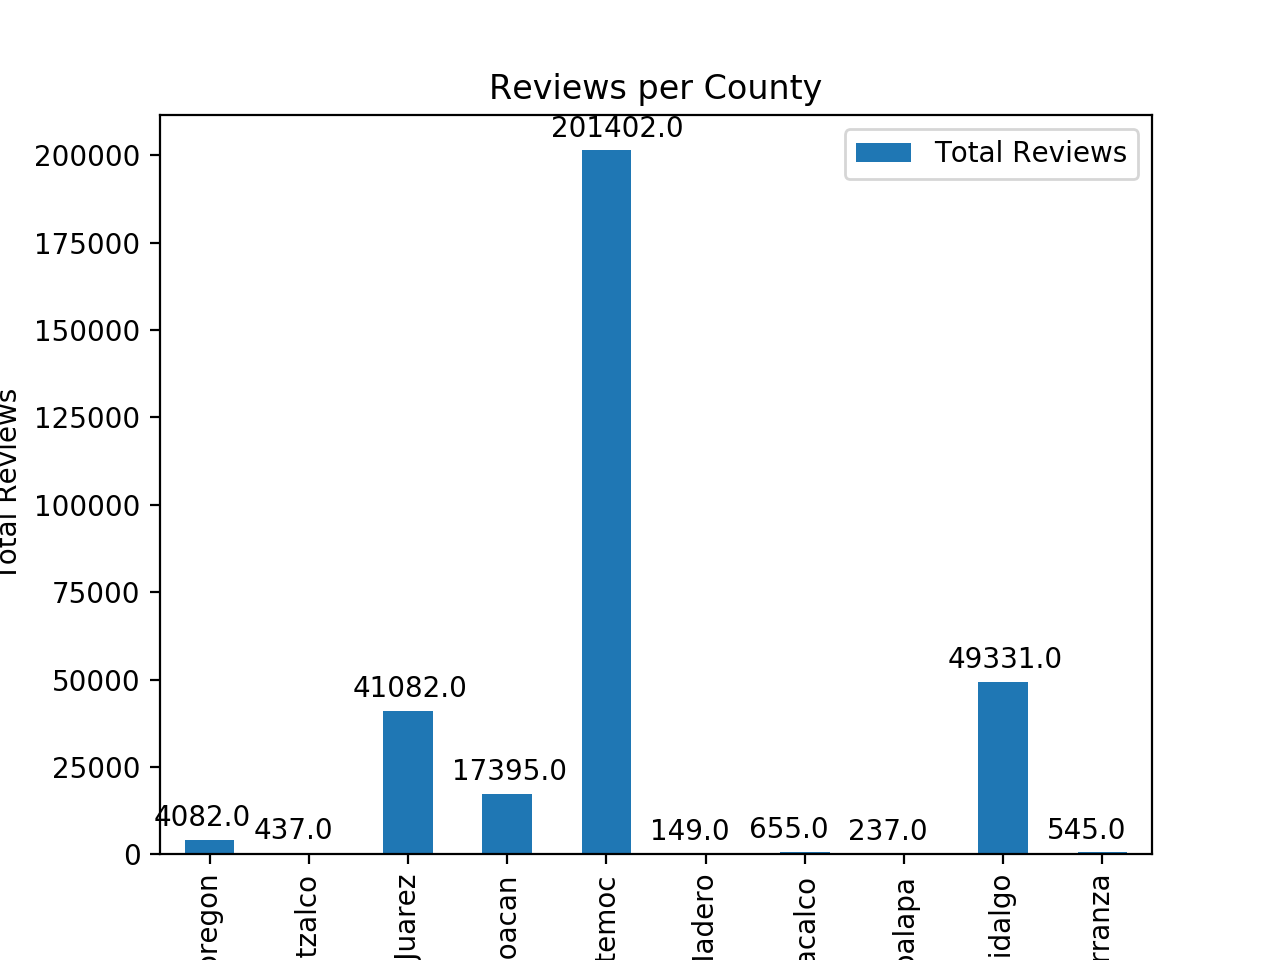

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [19]:
#reviews_neighborhood_df.plot(kind='bar',x="neighbourhood_cleansed",y="Total Announcements")

tabla_grafica = reviews_neighborhood_df[["Total Reviews"]]

ax = tabla_grafica[["Total Reviews"]].plot(kind="bar",title="Reviews per County",legend=True)
ax.set_xlabel("County")
ax.set_ylabel("Total Reviews")

for idx, label in enumerate(list(tabla_grafica.index)): 
        for acc in tabla_grafica.columns:
            value = np.round(tabla_grafica.ix[idx][acc],decimals=0)
            ax.annotate(value,
                        (idx, value),
                         xytext=(-20, 5), 
                         textcoords='offset points')
            
plt.savefig("Images/Reviews_County.png",bbox_inches = 'tight')
plt.show()

In [84]:
entire_room = reduced_df.loc[reduced_df["room_type"]=="Entire home/apt",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_03 = entire_room.groupby(["neighbourhood_cleansed"])
entire_count = table_df_03["number_of_reviews"].count()

private_room = reduced_df.loc[reduced_df["room_type"]=="Private room",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_04 = private_room.groupby(["neighbourhood_cleansed"])
private_count = table_df_04["number_of_reviews"].count()

table_counts01 = pd.merge(entire_count, private_count, on="neighbourhood_cleansed")
table_counts01 = table_counts01.rename(columns={"neighbourhood_cleansed":"Neighbourhood", 
                                                "number_of_reviews_x":"Entire home/apt", 
                                                "number_of_reviews_y":"Private room",
                                             })
table_counts01["Entire home/apt"] = table_counts01["Entire home/apt"].astype(float).map("{:,.0f}".format)
table_counts01["Private room"] = table_counts01["Private room"].astype(float).map("{:,.0f}".format)
table_counts01

,Entire home/apt,Private room
neighbourhood_cleansed,,
Alvaro Obregon,107,155
Azcapotzalco,14,12
Benito Juarez,928,"1,060"
Coyoacan,308,431
Cuauhtemoc,"3,538","2,067"
Gustavo A. Madero,5,7
Iztacalco,22,10
Iztapalapa,6,9
Miguel Hidalgo,"1,212",658


In [20]:
entire_room_sum = reduced_df.loc[reduced_df["room_type"]=="Entire home/apt",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_10 = entire_room_sum.groupby(["neighbourhood_cleansed"])
entire_sum = table_df_10["number_of_reviews"].sum()

private_room_sum = reduced_df.loc[reduced_df["room_type"]=="Private room",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_11 = private_room_sum.groupby(["neighbourhood_cleansed"])
private_sum = table_df_11["number_of_reviews"].sum()

table_sum01 = pd.merge(entire_sum, private_sum, on="neighbourhood_cleansed")
table_sum01 = table_sum01.rename(columns={"neighbourhood_cleansed":"Neighbourhood", 
                                                "number_of_reviews_x":"Entire home/apt", 
                                                "number_of_reviews_y":"Private room",
                                             })
table_sum01["Entire home/apt"] = table_sum01["Entire home/apt"].astype(float).map("{:,.0f}".format)
table_sum01["Private room"] = table_sum01["Private room"].astype(float).map("{:,.0f}".format)
table_sum01

,Entire home/apt,Private room
neighbourhood_cleansed,,
Alvaro Obregon,"2,095","1,975"
Azcapotzalco,347,88
Benito Juarez,"24,744","15,883"
Coyoacan,"9,306","7,891"
Cuauhtemoc,"146,569","54,269"
Gustavo A. Madero,100,49
Iztacalco,557,98
Iztapalapa,112,125
Miguel Hidalgo,"35,690","13,453"


In [30]:
listado = pd.read_csv("Table01.csv")
listado[listado.index.duplicated()]

delegaciones = reduced_df.groupby("neighbourhood")
avgscore = delegaciones.mean()["review_scores_rating"]
reviewcount = delegaciones["number_of_reviews"].count()
anoncount = delegaciones["neighbourhood"].count()
coloniatype = listado.set_index("neighbourhood")["neighbourhood_cleansed"]

del_table_df = pd.DataFrame({
    "Number of Reviews": reviewcount,
    "Average Score": avgscore,
    "Total of Announcements": anoncount,
    "County Type": coloniatype,
})

Alv_Ob = del_table_df[del_table_df['County Type']=="Alvaro Obregon"]
Azca = del_table_df[del_table_df['County Type']=="Azcapotzalco"]
Benito = del_table_df[del_table_df['County Type']=="Benito Juarez"]
Coyo = del_table_df[del_table_df['County Type']=="Coyoacann"]
Cuauh = del_table_df[del_table_df['County Type']=="Cuauhtemoc"]
Gustavo = del_table_df[del_table_df['County Type']=="Gustavo A. Madero"]
Iztaca = del_table_df[del_table_df['County Type']=="Iztacalco"]
Iztapa = del_table_df[del_table_df['County Type']=="Iztapalapa"]
Miguel = del_table_df[del_table_df['County Type']=="Miguel Hidalgo"]
Venus = del_table_df[del_table_df['County Type']=="Venustiano Carranza"]

FileNotFoundError: [Errno 2] File b'Table01.csv' does not exist: b'Table01.csv'

In [31]:
del01_count = Cuauh["Number of Reviews"]
del01_avg = Cuauh["Average Score"]
del01_counting = Cuauh["Total of Announcements"]

del02_count = Alv_Ob["Number of Reviews"]
del02_avg = Alv_Ob["Average Score"]
del02_counting = Alv_Ob["Total of Announcements"]

del03_count = Azca["Number of Reviews"]
del03_avg = Azca["Average Score"]
del03_counting = Azca["Total of Announcements"]

del04_count = Benito["Number of Reviews"]
del04_avg = Benito["Average Score"]
del04_counting = Benito["Total of Announcements"]

del05_count = Coyo["Number of Reviews"]
del05_avg = Coyo["Average Score"]
del05_counting = Coyo["Total of Announcements"]

del06_count = Gustavo["Number of Reviews"]
del06_avg = Gustavo["Average Score"]
del06_counting = Gustavo["Total of Announcements"]

del07_count = Iztaca["Number of Reviews"]
del07_avg = Iztaca["Average Score"]
del07_counting = Iztaca["Total of Announcements"]

del08_count = Iztapa["Number of Reviews"]
del08_avg = Iztapa["Average Score"]
del08_counting = Iztapa["Total of Announcements"]

del09_count = Miguel["Number of Reviews"]
del09_avg = Miguel["Average Score"]
del09_counting = Miguel["Total of Announcements"]

del10_count = Venus["Number of Reviews"]
del10_avg = Venus["Average Score"]
del10_counting = Venus["Total of Announcements"]

plt.scatter(del01_count, del01_avg, s=del01_counting, color="red",
            edgecolor="black", label="Cuauhtemoc",alpha=.8, linewidths=.25)

plt.scatter(del02_count, del02_avg, s=del02_counting, color="yellow",
            edgecolor="black", label="Al. Obr.",alpha=.8, linewidths=.25)

plt.scatter(del03_count, del03_avg, s=del03_counting, color="cyan",
            edgecolor="black", label="Azcapot",alpha=.8, linewidths=.25)

plt.scatter(del04_count, del04_avg, s=del04_counting, color="green",
            edgecolor="black", label="Ben. Juz.",alpha=.8, linewidths=.25)

plt.scatter(del05_count, del05_avg, s=del05_counting, color="m",
            edgecolor="black", label="Coyoacan",alpha=.8, linewidths=.25)

plt.scatter(del06_count, del06_avg, s=del06_counting, color="lavender",
            edgecolor="black", label="G. A. Madero",alpha=.8, linewidths=.25)

plt.scatter(del07_count, del07_avg, s=del07_counting, color="navy",
            edgecolor="black", label="Iztacalco",alpha=.8, linewidths=.25)

plt.scatter(del08_count, del08_avg, s=del08_counting, color="pink",
            edgecolor="black", label="Iztapalapa",alpha=.8, linewidths=.25)

plt.scatter(del09_count, del09_avg, s=del09_counting, color="blue",
            edgecolor="black", label="M. Hidalgo",alpha=.8, linewidths=.25)

plt.scatter(del10_count, del10_avg, s=del10_counting, color="black",
            edgecolor="black", label="Venus. Carrza.",alpha=.8, linewidths=.25)

lgnd = plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)

plt.suptitle("Announcements, Reviews and Average Score by County", fontsize=12)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Score")
plt.grid()

plt.savefig("ABB_PlotterBubble.png")

NameError: name 'Cuauh' is not defined

# Relation between room type and location

## Clean Data Frame to form groupby s

We will rename columns in oirder to have them with new name to start working with the Data Frame:

In [2]:
#import variables and read cvs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "data_base_clean.csv"
rooms_df = pd.read_csv(file, encoding="ISO-8859-1")
rooms_df.head()

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,bed_type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,Private room,1957,1,10,11/05/2018,0.58,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87.0
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,Private room,1906,1,39,02/05/2019,0.43,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89.0
2,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,Entire home/apt,1620,3,37,01/01/2019,0.41,1,173,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",100.0
3,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,Private room,953,2,51,05/04/2019,2.69,3,180,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",98.0
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,Entire home/apt,1810,2,39,24/02/2019,0.43,3,340,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",98.0


In [3]:
#For our purpose we name columns as convenient: 
new_rooms_df=rooms_df.rename(
    columns={"host_name": "Host name",
            "neighbourhood_cleansed":"County",
            "room_type":"Room type",
            "bed_type":"Bed type"})
new_rooms_df

,id,name,host_id,Host name,County,neighbourhood,zipcode,latitude,longitude,Room type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Bed type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,Private room,1957,1,10,11/05/2018,0.58,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87.0
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,Private room,1906,1,39,02/05/2019,0.43,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89.0
2,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,Entire home/apt,1620,3,37,01/01/2019,0.41,1,173,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",100.0
3,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,Private room,953,2,51,05/04/2019,2.69,3,180,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",98.0
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,Entire home/apt,1810,2,39,24/02/2019,0.43,3,340,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",98.0
5,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Coyoacan,Coyoacan,4100,19.35601,-99.16167,Entire home/apt,1048,3,92,12/04/2019,1.04,4,276,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",98.0
6,70737,Great studio Coyoacan!,212109,Trisha,Coyoacan,Coyoacan,4100,19.35466,-99.16304,Entire home/apt,1124,3,31,20/07/2015,0.31,4,294,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",99.0
7,180808,"Huge Luxurious Suite 70's style, perfectly loc...",36836,Roberto,Cuauhtemoc,Juarez,6600,19.42428,-99.16843,Entire home/apt,1029,3,32,10/03/2019,0.37,1,328,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",94.0
8,245507,TRENDY APARTMENT IN ZONA ROSA / JUAREZ DISTRICT,1288063,Francisco & Rodolfo,Cuauhtemoc,Juarez,6600,19.42510,-99.17067,Entire home/apt,1315,1,246,08/05/2019,2.66,16,348,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",97.0
9,246057,HIP APARTMENT ONE BLOCK REFORMA,1288063,Francisco & Rodolfo,Cuauhtemoc,Juarez,6600,19.42373,-99.17140,Entire home/apt,1429,1,229,01/05/2019,2.49,16,365,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",98.0


## Count room types

Start counting the room types we have in our data set

In [4]:
#count type of rooms
clean_room_df = new_rooms_df["Room type"]
candid_count=clean_room_df.value_counts()
candid_count

Entire home/apt    6153
Private room       4419
Shared room         124
Name: Room type, dtype: int64

In [5]:
#We get the number of rooms in the dataset
total_rooms=len(new_rooms_df["Room type"])
total_rooms

10696

## Get data to compare Room Type VS Location 

We will do some groupbys in oirder to get dataframes to know specififc information:

### Room type by location with its metrics

We can know in which county are the the room type and know their Price Stats (per night), Count, Percentage, Total of reviews and Avg Rating score.

In [6]:
#Build groupby with Neighbourhood and room type
roomtype_neighborhood=new_rooms_df.groupby(["County","Room type"])

roomtype_neighborhood_count=roomtype_neighborhood['Room type'].count()
roomtype_neighborhood_maxprice=roomtype_neighborhood['price'].max()
roomtype_neighborhood_minprice=roomtype_neighborhood['price'].min()
roomtype_neighborhood_avgprice=roomtype_neighborhood['price'].mean()
roomtype_neighborhood_percentage=np.round((roomtype_neighborhood_count/total_rooms)*100,decimals=2)
roomtype_reviews=roomtype_neighborhood['number_of_reviews'].sum()
roomtype_reviews_score=roomtype_neighborhood['review_scores_rating'].mean()

#Create a summary data frame to hold the results
roomtype_neighborhood_df=pd.DataFrame({"Room Count":roomtype_neighborhood_count,
                                "Max Room Price":roomtype_neighborhood_maxprice,
                                      "Min Room Price":roomtype_neighborhood_minprice,
                                      "Avg Room Price":roomtype_neighborhood_avgprice,
                                      "Representative Percentage (%)":roomtype_neighborhood_percentage,
                                      "Total of reviews":roomtype_reviews,
                                      "Avg Reviews Score Rating":roomtype_reviews_score})

#Map format
roomtype_neighborhood_df["Max Room Price"]=roomtype_neighborhood_df["Max Room Price"].map("${:.2f}".format)
roomtype_neighborhood_df["Min Room Price"]=roomtype_neighborhood_df["Min Room Price"].map("${:.2f}".format)
roomtype_neighborhood_df["Avg Room Price"]=roomtype_neighborhood_df["Avg Room Price"].map("${:.2f}".format)
roomtype_neighborhood_df["Avg Reviews Score Rating"]=roomtype_neighborhood_df["Avg Reviews Score Rating"].map("{:.2f}".format)
                                                                                                              
# Save csv file
roomtype_neighborhood_df.to_csv("roomtype_neigbourhood_stats.csv",index=True)
                                                                                                              
roomtype_neighborhood_df

Room Count Max Room Price Min Room Price  \
County              Room type                                                   
Alvaro Obregon      Entire home/apt         107       $6251.00        $191.00   
                    Private room            155       $5317.00        $172.00   
                    Shared room               2        $495.00        $400.00   
Azcapotzalco        Entire home/apt          14       $1748.00        $419.00   
                    Private room             12        $760.00        $190.00   
                    Shared room               1        $399.00        $399.00   
Benito Juarez       Entire home/apt         928      $23974.00        $191.00   
                    Private room           1060       $7985.00        $172.00   
                    Shared room              21        $991.00        $191.00   
Coyoacan            Entire home/apt         308      $11587.00        $191.00   
                    Private room            431      $28586.00        $172.00   
                    Shared room               9       $2649.00        $190.00   
Cuauhtemoc          Entire home/apt        3538      $36484.00          $0.00   
                    Private room           2067      $57172.00        $172.00   
                    Shared room              75       $4669.00        $190.00   
Gustavo A. Madero   Entire home/apt           5       $1824.00        $399.00   
                    Private room              7        $551.00        $209.00   
Iztacalco           Entire home/apt          22       $1296.00        $248.00   
                    Private room             10        $400.00        $210.00   
Iztapalapa          Entire home/apt           6       $2001.00        $667.00   
                    Private room              9        $495.00        $229.00   
Miguel Hidalgo      Entire home/apt        1212     $190573.00          $0.00   
                    Private room            658      $10653.00          $0.00   
                    Shared room              15       $2888.00        $191.00   
Venustiano Carranza Entire home/apt          13       $4193.00        $380.00   
                    Private room             10        $874.00        $191.00   
                    Shared room               1        $191.00        $191.00   

                                    Avg Room Price  \
County              Room type                        
Alvaro Obregon      Entire home/apt       $1168.40   
                    Private room           $670.65   
                    Shared room            $447.50   
Azcapotzalco        Entire home/apt        $915.07   
                    Private room           $365.92   
                    Shared room            $399.00   
Benito Juarez       Entire home/apt       $1026.78   
                    Private room           $433.58   
                    Shared room            $370.33   
Coyoacan            Entire home/apt       $1231.65   
                    Private room           $658.09   
                    Shared room            $542.11   
Cuauhtemoc          Entire home/apt       $1542.79   
                    Private room           $635.54   
                    Shared room            $355.97   
Gustavo A. Madero   Entire home/apt       $1007.00   
                    Private room           $325.71   
Iztacalco           Entire home/apt        $531.82   
                    Private room           $251.80   
Iztapalapa          Entire home/apt       $1254.83   
                    Private room           $330.33   
Miguel Hidalgo      Entire home/apt       $2191.81   
                    Private room           $662.68   
                    Shared room            $586.27   
Venustiano Carranza Entire home/apt        $923.08   
                    Private room           $304.60   
                    Shared room            $191.00   

                                     Representative Percentage (%)  \
County              Room type                     

# Grouped Bar plot

In this bar plot it is represented the counties and how many room types they have.

In [7]:
#We will create the appropriate data framework to get the count of the rooms by county

#filter by Entire home/apt and count
total_entire_roomtype=new_rooms_df.loc[new_rooms_df["Room type"] == "Entire home/apt"]
roomtype_entire_count_neighborhood=total_entire_roomtype.groupby(["County"])

entire_roomtypecount_neighborhood_count=roomtype_entire_count_neighborhood['Room type'].count()

 #filter by Private room and count
total_private_roomtype=new_rooms_df.loc[new_rooms_df["Room type"] == "Private room"]
roomtype_private_count_neighborhood=total_private_roomtype.groupby(["County"])

private_roomtypecount_neighborhood_count=roomtype_private_count_neighborhood['Room type'].count()

 #filter by Shared room and count
total_shared_roomtype=new_rooms_df.loc[new_rooms_df["Room type"] == "Shared room"]
roomtype_shared_count_neighborhood=total_shared_roomtype.groupby(["County"])

shared_roomtypecount_neighborhood_count=roomtype_shared_count_neighborhood['Room type'].count()

#Create a summary data frame to hold the results
roomtypecount_neighborhood_df=pd.DataFrame({"Entire home/apt Count":entire_roomtypecount_neighborhood_count,
                                           "Private room Count":private_roomtypecount_neighborhood_count,
                                           "Shared room Count":shared_roomtypecount_neighborhood_count})

#Then we take out NaNs and give appropriate format to the data frame, 'Shared room' column is a float data type column
roomtypecount_neighborhood_df['Shared room Count'] =roomtypecount_neighborhood_df['Shared room Count'].fillna(0)
roomtypecount_neighborhood_df['Shared room Count']=roomtypecount_neighborhood_df['Shared room Count'].astype(int)


roomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count
Alvaro Obregon,107,155,2
Azcapotzalco,14,12,1
Benito Juarez,928,1060,21
Coyoacan,308,431,9
Cuauhtemoc,3538,2067,75
Gustavo A. Madero,5,7,0
Iztacalco,22,10,0
Iztapalapa,6,9,0
Miguel Hidalgo,1212,658,15
Venustiano Carranza,13,10,1


In [8]:
#Then we take index into a column in order to get the length of the column
roomtypecount_neighborhood_df['County'] = roomtypecount_neighborhood_df.index

roomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count,County
Alvaro Obregon,107,155,2,Alvaro Obregon
Azcapotzalco,14,12,1,Azcapotzalco
Benito Juarez,928,1060,21,Benito Juarez
Coyoacan,308,431,9,Coyoacan
Cuauhtemoc,3538,2067,75,Cuauhtemoc
Gustavo A. Madero,5,7,0,Gustavo A. Madero
Iztacalco,22,10,0,Iztacalco
Iztapalapa,6,9,0,Iztapalapa
Miguel Hidalgo,1212,658,15,Miguel Hidalgo
Venustiano Carranza,13,10,1,Venustiano Carranza


In [9]:
# Create arrays to plot shared bars that contains the count by room type in each County
entire_home_list=roomtypecount_neighborhood_df["Entire home/apt Count"].tolist()
private_room_list=roomtypecount_neighborhood_df["Private room Count"].tolist()
shared_room_list=roomtypecount_neighborhood_df["Shared room Count"].tolist()
x_axis = np.arange(len(roomtypecount_neighborhood_df['County']))

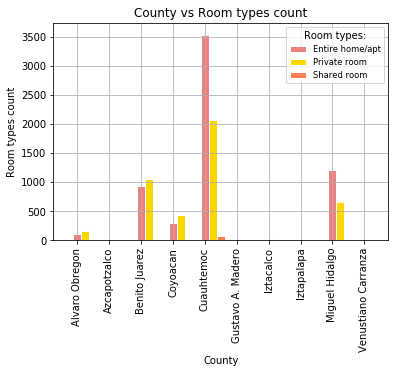

In [10]:
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = entire_home_list
bars2 = private_room_list
bars3 = shared_room_list
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.grid()

# Make the plot
plt.bar(r1, bars1, color='lightcoral', width=barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(r2, bars2, color='gold', width=barWidth, edgecolor='white', label='Private room')
plt.bar(r3, bars3, color='coral', width=barWidth, edgecolor='white', label='Shared room')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,roomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(roomtypecount_neighborhood_df['Entire home/apt Count']+200))
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="best",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

#Save figure
plt.savefig("Images/Count_general.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Select some Counties to have a closer view of the Data
('Azcapotzalco','Gustavo A. Madero','Iztacalco','Iztapalapa','Venustiano Carranza')

In [11]:
#We make new data frame with some counties, using loc:
inc_roomoomtypecount_neighborhood_df=roomtypecount_neighborhood_df.loc[['Azcapotzalco','Gustavo A. Madero','Iztacalco','Iztapalapa','Venustiano Carranza']]
inc_roomoomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count,County
Azcapotzalco,14,12,1,Azcapotzalco
Gustavo A. Madero,5,7,0,Gustavo A. Madero
Iztacalco,22,10,0,Iztacalco
Iztapalapa,6,9,0,Iztapalapa
Venustiano Carranza,13,10,1,Venustiano Carranza


In [12]:
# Create arrays to plot shared bars that contains the count by room type in each County
inc_entire_home_list=inc_roomoomtypecount_neighborhood_df["Entire home/apt Count"].tolist()
inc_private_room_list=inc_roomoomtypecount_neighborhood_df["Private room Count"].tolist()
inc_shared_room_list=inc_roomoomtypecount_neighborhood_df["Shared room Count"].tolist()
inc_x_axis = np.arange(len(inc_roomoomtypecount_neighborhood_df['County']))

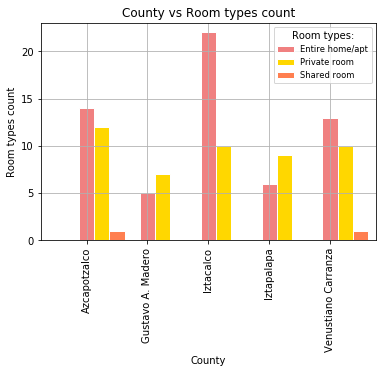

In [13]:
# set width of bar
inc_barWidth = 0.25

# set height of bar
inc_bars1 = inc_entire_home_list
inc_bars2 = inc_private_room_list
inc_bars3 = inc_shared_room_list
# Set position of bar on X axis
inc_r1 = np.arange(len(inc_bars1))
inc_r2 = [x + inc_barWidth for x in inc_r1]
inc_r3 = [x + inc_barWidth for x in inc_r2]

plt.grid()

# Make the plot
plt.bar(inc_r1, inc_bars1, color='lightcoral', width=inc_barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(inc_r2, inc_bars2, color='gold', width=inc_barWidth, edgecolor='white', label='Private room')
plt.bar(inc_r3, inc_bars3, color='coral', width=inc_barWidth, edgecolor='white', label='Shared room')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,inc_roomoomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(inc_x_axis)-0.25)
plt.ylim(0, max(inc_roomoomtypecount_neighborhood_df['Entire home/apt Count'])+1)
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="best",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

#Save figure
plt.savefig("Images/Count_specific.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Select some Counties to have a closer view of the Data 2

'Alvaro Obregon','Benito Juarez','Coyoacan','Miguel Hidalgo'

In [14]:
#We make new data frame with some counties, using loc:
inc2_roomoomtypecount_neighborhood_df=roomtypecount_neighborhood_df.loc[['Alvaro Obregon','Benito Juarez','Coyoacan','Miguel Hidalgo']]
inc2_roomoomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count,County
Alvaro Obregon,107,155,2,Alvaro Obregon
Benito Juarez,928,1060,21,Benito Juarez
Coyoacan,308,431,9,Coyoacan
Miguel Hidalgo,1212,658,15,Miguel Hidalgo


In [15]:
# Create arrays to plot shared bars that contains the count by room type in each County
inc2_entire_home_list=inc2_roomoomtypecount_neighborhood_df["Entire home/apt Count"].tolist()
inc2_private_room_list=inc2_roomoomtypecount_neighborhood_df["Private room Count"].tolist()
inc2_shared_room_list=inc2_roomoomtypecount_neighborhood_df["Shared room Count"].tolist()
inc2_x_axis = np.arange(len(inc2_roomoomtypecount_neighborhood_df['County']))

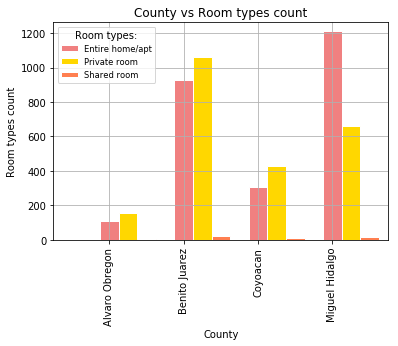

In [16]:
# set width of bar
inc2_barWidth = 0.25

# set height of bar
inc2_bars1 = inc2_entire_home_list
inc2_bars2 = inc2_private_room_list
inc2_bars3 = inc2_shared_room_list
# Set position of bar on X axis
inc2_r1 = np.arange(len(inc2_bars1))
inc2_r2 = [x + inc2_barWidth for x in inc2_r1]
inc2_r3 = [x + inc2_barWidth for x in inc2_r2]

plt.grid()

# Make the plot
plt.bar(inc2_r1, inc2_bars1, color='lightcoral', width=inc2_barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(inc2_r2, inc2_bars2, color='gold', width=inc2_barWidth, edgecolor='white', label='Private room')
plt.bar(inc2_r3, inc2_bars3, color='coral', width=inc2_barWidth, edgecolor='white', label='Shared room')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,inc2_roomoomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(inc2_x_axis)-0.25)
plt.ylim(0, max(inc2_roomoomtypecount_neighborhood_df['Entire home/apt Count'])+50)
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="upper left",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

#Save figure
plt.savefig("Images/Count_specific2.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Graph just the Shared Rooms

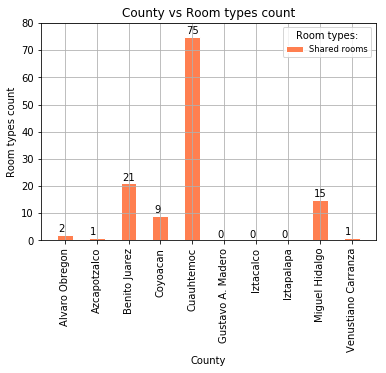

In [17]:
# set width of bar
barWidth = 0.5

# set height of bar
bars = shared_room_list
# Set position of bar on X axis
r3 = np.arange(len(bars1))

plt.grid()

# Make the plot
plt.bar(r3, bars, color='coral', width=barWidth, edgecolor='white', label='Shared rooms')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,roomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(roomtypecount_neighborhood_df['Shared room Count'])+5)
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="best",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

xlocs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]

for i, v in enumerate(bars):
    plt.text(xlocs[i] - 1.2, v +1, str(v))

#Save figure
plt.savefig("Images/Count_shared.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Pie Chart

In [18]:
#Create DataFrame
roomtype_chart=new_rooms_df.groupby(["Room type"])

roomtype_neighborhood_count=roomtype_chart['Room type'].count()

#Create a summary data frame to hold the results
roomtype_chart_df=pd.DataFrame({"Room Count":roomtype_neighborhood_count
                             })
roomtype_chart_df

,Room Count
Room type,
Entire home/apt,6153
Private room,4419
Shared room,124


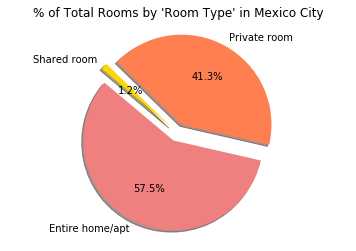

In [19]:

#Define data of the pie chart
types=roomtype_chart_df.index
rooms=roomtype_chart_df['Room Count']
colors=["lightcoral","coral","gold"]
explode = (0.1,0.1,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.title("% of Total Rooms by 'Room Type' in Mexico City")
plt.pie(rooms, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Save figure
plt.savefig("Images/Proportion_Room_types_cdmx.png")

# Show Figure
plt.show()